# Entrenando un modelo de ML con scikit-learn

Créditos: Material presentado en este notebook está basado en el curso del [Data School](http://www.dataschool.io/) "Machine Learning with Text in Python", cuyos videos están disponibles en [YouTube](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A) y los notebooks en [GitHub](https://github.com/justmarkham/scikit-learn-videos).

**Nota:** Este notebook utiliza Python 3.6 and scikit-learn 0.22.2.

## Objetivo

- Implementaremos varios modelos de ML para clasificar plantas de la familia Iris en una de tres especies, usando la longitud y ancho de sus pétalos y sépalos.

## Agenda

- ¿Qué es el dataset Iris y cómo se puede utilizar para hacer machine learning (ML)?
- ¿Cómo se puede cargar el dataset Iris con scikit-learn?
- ¿Cómo se describe un dataset usando la terminología de ML?
- ¿Cuáles son los cuatro principales requisitos de scikit-learn para trabajar con datos?
- ¿Cómo funciona el algoritmo **K-nearest neighbors** para crear modelos de predicción?
- ¿Cuáles son los cuatro pasos para realizar el **entrenamiento y predicción de modelos** con scikit-learn?
- ¿Cómo puedo aplicar este proceso con **otros modelos de machine learning**?

# Introduccion al dataset iris

Para construir los modelos, utilizaremos el [conjunto de datos flor Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris), el cual es un conjunto clásico en la comunidad de ML por ser sencillo y útil para explicar los resultados obtenidos de los modelos.

En el conjunto a utilizar, las muestras de flor Iris caen dentro de tres especies: Iris setosa, Iris versicolor, y Iris virgínica. En principio, las tres especies pueden lucir muy parecidas entre sí, especialmente entre las dos últimas especies (versicolor y virginica). Sin embargo, y gracias a las cuidadosas mediciones de los investigadores Anderson y Fisher, una muestra puede ser clasificada con un alto grado de precisión por medio de modelos de ML.

![Iris](img/03_iris.png)

El conjunto de datos Iris consiste 
- 50 muestras de 3 especies distintas de iris (150 muestras en total). Los iris tambien son conocido comunmente como lirios.
- Medidas: longitud del sépalo, ancho del sépalo, longitud del pétalo, ancho del pétalo
- Iris es un género de plantas rizomatosas de la familia Iridaceae. El mayor género de la familia con más de 300 especies, además de muchos híbridos y cultivares. Además del nombre del género, iris se usa comúnmente para referirse a todas las especies, así como a otros varios géneros estrechamente emparentados y a una subdivisión dentro del género. Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Iris_(planta))


| Setosa | Versicolor | Virginica |
| :-: | :-: | :-: |
| <img src="img/iris_setosa.jpg" width="200"/> | <img src="img/iris_versicolor.jpg" width="200"/> | <img src="img/iris_virginica.jpg" width="200"/> |

## Cargando el dataset iris con scikit-learn

In [1]:
# importa la funcion load_iris del modulo datasets
from sklearn.datasets import load_iris

In [2]:
# guarda el objeto tipo "bunch", que contiene el dataset iris y sus atributos
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [6]:
# imprime la data the iris data
# encontraras 150 muestras o filas, cada una con cuatro valores
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
# si solo quieres ver el principio del conjunto de datos (usualmente eso es suficiente para tener una idea)
# por ejemplo, para ver las primeras diez filas
iris.data[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

<b>Pregunta:</b> Que tipo de objeto es `iris.data`? Escribe el comando en la celda de abajo. Para una guia de que comando usar, revisa en las celdas de arriba.

In [ ]:
type(iris.data)

<b>Pregunta:</b> Como muestras las cinco primeras filas del conjunto de datos `iris.data`? 

Para encontrar la respuesta puedes usar las siguientes referencias:
- NumPy: the absolute basics for beginners. Indexing and slicing. https://numpy.org/doc/stable/user/absolute_beginners.html#indexing-and-slicing
- Cálculo numérico con Numpy. http://research.iac.es/sieinvens/python-course/numpy.html

In [10]:
iris.data[0:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

<b>Pregunta:</b> Como muestras los ultimos diez valores de la tercera columna del conjunto de datos `iris.data`? 

Puedes usar las mismas referencias de arriba para encontrar la respuesta.

In [13]:
iris.data[140:,2]

array([5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [14]:
# imprime los nombres de las cuatro caracteristicas
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Pregunta:** Puedes explicar por que cada fila del dataset tiene cuatro valores?

In [16]:
# imprime los numeros enteros que representan las distintas especies de cada observacion
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Pregunta:** Cuantas especies distintas posee el dataset iris?

In [17]:
# imprime el esquema de especies: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Resumen del dataset iris

- 150 **observaciones**
- 4 **caracteristicas** (longitud del sépalo, ancho del sépalo, longitud del pétalo, ancho del pétalo)
- Variable de **respuesta** es la especie iris
- Es un problema de **clasificacion** ya que la respuesta es categorica
- Para mayor informacion sobre el dataset, consultar [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris) o [Wikipedia - Conjunto de datos flor iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)

# Terminologia de Machine learning

- Cada fila es una **observacion** (tambien conocida como: muestra, ejemplo, caso o registro)
- Cada columna es una **caracteristica** (tambien conocido como: predictor, atributo, variable independiente, regresor, o covariable)
- Cada valor que predecimos es la **respuesta** (tambien conocida como objetivo, etiqueta, o variable dependiente)
- **Clasificacion** es aprendizaje supervisado en donde la respuesta es categorica
- **Regresion** es aprendizaje supervisado en donde la respuesta es continua

# Clasificacion con Algoritmo K-nearest neighbors (KNN)

Funcionamiento básico del algoritmo:
1. Selecciona un valor para K. Este valor es provisto antes de que se ejecute el algoritmo.
2. Realiza una búsqueda de las K observaciones más "cercanas" a las mediciones de la flor iris por identificar, en el conjunto de datos de entrenamiento.
3. Usa el valor de la respuesta más común entre los K vecinos más cercanos como el valor de respuesta (predicción) para la flor iris por identificar.

### Ejemplo del Conjunto de Datos de Entrenamiento

![Training data](img/04_knn_dataset.png)

### Mapa de Clasificacion KNN (K=1)

![1NN classification map](img/04_1nn_map.png)

### Mapa de Clasificacion KNN (K=5)

![5NN classification map](img/04_5nn_map.png)

*Image Credits: [Data3classes](http://commons.wikimedia.org/wiki/File:Data3classes.png#/media/File:Data3classes.png), [Map1NN](http://commons.wikimedia.org/wiki/File:Map1NN.png#/media/File:Map1NN.png), [Map5NN](http://commons.wikimedia.org/wiki/File:Map5NN.png#/media/File:Map5NN.png) by Agor153. Licensed under CC BY-SA 3.0*

## Cargando el conjunto de datos

In [25]:
# importa la funcion load_iris del modulo datasets
from sklearn.datasets import load_iris

# guarda el objeto tipo "bunch", que contiene el dataset iris y sus atributos
iris = load_iris()

# almacena la matriz de caracteristicas en "X"
X = iris.data

# almacena el vector de respuesta en "y"
y = iris.target

In [26]:
# imprime las dimensiones de "X" y "y"
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Proceso de 4-etapas para crear el modelo en scikit-learn


**Paso 1:** Importa la clase del algoritmo que planeas utilizar

In [27]:
from sklearn.neighbors import KNeighborsClassifier

**Paso 2:** "Instancia" o crea el "estimador"

- "Estimador" es el termino de scikit-learn para modelo
- "Instanciar" significa "crear una instancia (objeto) de"

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

- El nombre del objeto no importa, puedes seleccionar el que desees
- Puedes especificar tambien los parametros de entrenamiento (tambien conocidos como "hiperparametros") durante la creacion de la instancia/objeto
- Cualquier parametro que no sea especifico utilizara un valor por defecto

In [29]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


**Paso 3:** Ajustar (fit) el modelo a los datos (conocido como el "entrenamiento del modelo")

- El modelo aprende la relacion entre "X" y "y"
- Ocurre "in-place" (el modelo se actualiza con los resultados del entrenamiento)

In [30]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

**Paso 4:** Predecir la respuesta para una nueva muestra

- Las nuevas muestras son aquellos datos no utilizados durante el entrenamiento
- Utiliza la informacion aprendida durante el proceso de entrenamiento del modelo

In [31]:
knn.predict([[3, 5, 4, 2]])

array([2])

- Retorna un arreglo de tipo "NumPy"
- El modelo puede predecir multiples muestras a la vez

In [32]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

## Usando un valor diferente para K

In [33]:
# Crea el modelo o estimador (usando el valor K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# entrena el modelo con el dataset
knn.fit(X, y)

# predice la clase para las nuevas observaciones
knn.predict(X_new)

array([1, 1])

## Como encontrar un valor de K apropiado

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

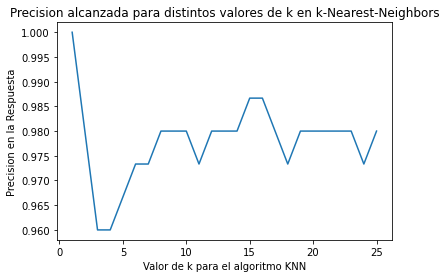

In [37]:
# experimentando con valores entre 1 y 25
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Valor de k para el algoritmo KNN')
plt.ylabel('Precision en la Respuesta')
plt.title('Precision alcanzada para distintos valores de k en k-Nearest-Neighbors')
plt.show()

**Pregunta:** Cual es (o son) los valores de K que debemos seleccionar segun la grafica?

**Pregunta:** Debemos escoger el valor de K = 1? Que dice la grafica?

**Pregunta:** Que valor de K escogerias finalmente?

# Clasificacion con Algoritmo de Regresion Logistica

In [12]:
# importa la clase
from sklearn.linear_model import LogisticRegression

# Crea el modelo (utilizando los valores por defecto)
logreg = LogisticRegression()

# entrena el modelo con el dataset
logreg.fit(X, y)

# predice la clase para las nuevas observaciones
logreg.predict(X_new)

array([2, 0])

**Pregunta:** 

# Recursos

- Kaggle. [Using Scikit-learn to Implement a Simple Decision Tree Classifier](https://www.kaggle.com/chrised209/decision-tree-modeling-of-the-iris-dataset)
- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)
- [Logistic Regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (user guide), [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (class documentation)
- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()